In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
path = Path('../data')

if not iskaggle and not path.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [3]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [4]:
if iskaggle: path = Path('../input/titanic')

In [5]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [8]:
df.fillna(modes, inplace=True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
import numpy as np

df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


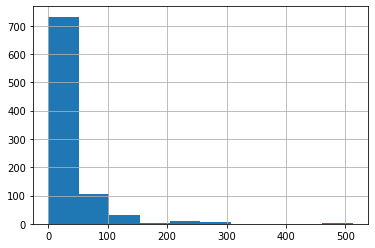

In [11]:
df['Fare'].hist();

In [12]:
df['LogFare'] = np.log(df['Fare']+1)

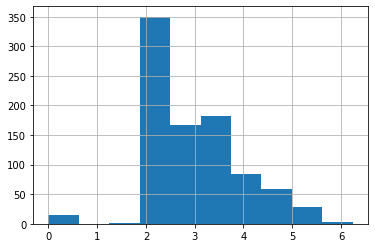

In [13]:
df['LogFare'].hist();

In [14]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [15]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [16]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [17]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [18]:
from torch import tensor

t_dep = tensor(df.Survived)

In [19]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [20]:
t_indep.shape

torch.Size([891, 12])

In [21]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [22]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [23]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [24]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [25]:
t_indep = t_indep / vals

In [26]:
preds = (t_indep*coeffs).sum(axis=1)

In [27]:
preds[:10]

tensor([ 0.3675, -0.2917,  0.3131,  0.5119,  0.3638,  0.2121,  0.5599,  0.3742,  0.3246, -0.4591])

In [28]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5415)

In [29]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [30]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [31]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5415, grad_fn=<MeanBackward0>)

In [32]:
loss.backward()

In [33]:
coeffs.grad

tensor([ 0.0003,  0.0018, -0.0005, -0.0034,  0.2548, -0.1908, -0.1212, -0.0067,  0.1919, -0.1886,  0.0191,  0.2334])

In [34]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5172)


In [35]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [36]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [37]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)

In [38]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [39]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [40]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [41]:
coeffs = train_model(18, lr=0.02)

0.539; 0.535; 0.525; 0.511; 0.492; 0.468; 0.440; 0.413; 0.425; 0.428; 0.424; 0.408; 0.380; 0.348; 0.310; 0.300; 0.315; 0.339; 

In [42]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.4612),
 'SibSp': tensor(0.1381),
 'Parch': tensor(0.2464),
 'LogFare': tensor(-0.1710),
 'Sex_male': tensor(-0.3652),
 'Sex_female': tensor(0.2865),
 'Pclass_1': tensor(0.8605),
 'Pclass_2': tensor(0.3752),
 'Pclass_3': tensor(0.3445),
 'Embarked_C': tensor(0.1800),
 'Embarked_Q': tensor(0.2307),
 'Embarked_S': tensor(0.2222)}

In [43]:
preds = calc_preds(coeffs, val_indep)

In [44]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True,  True])

In [45]:
results.float().mean()

tensor(0.7753)

In [46]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7753)

In [47]:
preds[:28]

tensor([0.8793, 0.1987, 0.1483, 0.2120, 0.2188, 0.2184, 0.8058, 0.8703, 0.2089, 0.8044, 0.1896, 0.1543, 0.1993, 0.8504, 0.1902, 0.6997,
        0.6983, 0.8745, 0.2149, 0.8411, 0.1902, 0.6989, 1.3124, 0.8779, 0.1909, 0.1962, 0.8512, 0.6985])

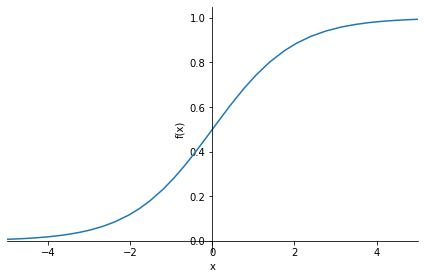

In [48]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [49]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [50]:
coeffs = train_model(lr=2)

0.524; 0.484; 0.409; 0.336; 0.296; 0.273; 0.256; 0.242; 0.229; 0.219; 0.212; 0.207; 0.204; 0.202; 0.200; 0.199; 0.199; 0.199; 0.198; 0.198; 0.198; 0.198; 0.198; 0.198; 0.197; 0.197; 0.197; 0.196; 0.196; 0.195; 

In [51]:
acc(coeffs)

tensor(0.8258)

In [52]:
show_coeffs()

{'Age': tensor(-0.4880),
 'SibSp': tensor(-0.0022),
 'Parch': tensor(0.2237),
 'LogFare': tensor(0.0344),
 'Sex_male': tensor(-20.6623),
 'Sex_female': tensor(17.1042),
 'Pclass_1': tensor(6.8089),
 'Pclass_2': tensor(3.8157),
 'Pclass_3': tensor(-12.5237),
 'Embarked_C': tensor(2.6862),
 'Embarked_Q': tensor(1.0984),
 'Embarked_S': tensor(-6.6311)}

In [53]:
tst_df = pd.read_csv(path/'test.csv')

In [54]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [55]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [56]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [57]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [58]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [59]:
(val_indep*coeffs).sum(axis=1)

tensor([ 22.0189, -32.0876, -30.4998, -23.4752, -23.4772, -23.4775,   7.2750,  14.2891, -39.8015,   7.2738, -39.8176, -30.4930, -39.8090,
          5.6790, -39.8179, -20.4850, -20.4865,  14.2961, -23.4777,  -2.0509, -39.8170, -20.4858,  26.6067,  14.3014, -39.8168, -32.0867,
         -2.0422, -20.4863, -39.8164,   5.6790,  14.3023,  -2.0361, -39.8166, -39.8175,  22.0184,  -2.0353, -20.4849,  26.6013, -39.8170,
         -2.0506, -23.4769, -39.8170, -23.4651,  26.6008, -39.8167,  -2.0193, -39.8155, -39.8158, -32.0876,  -2.0504, -12.7544, -39.8021,
        -39.8024, -39.8172, -23.4775, -23.4779, -32.0876, -39.8174, -39.8168, -39.8168, -11.1665, -39.8166, -20.4875, -39.8168,  14.2884,
        -20.4760, -23.4771, -39.8172, -32.0820,  14.2879, -39.8172,   7.2798, -23.4779, -39.8169, -20.4834, -39.8164, -39.8170, -20.4834,
        -23.4768, -23.4788, -23.4683,  26.6151, -39.8169, -39.8171,  14.2873, -14.1466, -11.1645,  17.2977,  23.6069, -23.4771, -39.8176,
        -39.8170,  26.6012, -30.50

In [60]:
val_indep@coeffs

tensor([ 22.0189, -32.0876, -30.4998, -23.4752, -23.4772, -23.4775,   7.2750,  14.2891, -39.8015,   7.2738, -39.8176, -30.4930, -39.8090,
          5.6790, -39.8179, -20.4850, -20.4865,  14.2961, -23.4777,  -2.0509, -39.8170, -20.4858,  26.6067,  14.3014, -39.8168, -32.0867,
         -2.0422, -20.4863, -39.8164,   5.6790,  14.3023,  -2.0361, -39.8166, -39.8175,  22.0184,  -2.0353, -20.4849,  26.6013, -39.8170,
         -2.0506, -23.4769, -39.8170, -23.4651,  26.6008, -39.8167,  -2.0193, -39.8155, -39.8158, -32.0876,  -2.0504, -12.7544, -39.8021,
        -39.8024, -39.8172, -23.4775, -23.4779, -32.0876, -39.8174, -39.8168, -39.8168, -11.1665, -39.8166, -20.4875, -39.8168,  14.2884,
        -20.4760, -23.4771, -39.8172, -32.0820,  14.2879, -39.8172,   7.2798, -23.4779, -39.8169, -20.4834, -39.8164, -39.8170, -20.4834,
        -23.4768, -23.4788, -23.4683,  26.6151, -39.8169, -39.8171,  14.2873, -14.1466, -11.1645,  17.2977,  23.6069, -23.4771, -39.8176,
        -39.8170,  26.6012, -30.50

In [61]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [62]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [63]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [64]:
coeffs = train_model(lr=2)

0.512; 0.470; 0.397; 0.330; 0.293; 0.272; 0.256; 0.241; 0.228; 0.218; 0.211; 0.206; 0.204; 0.202; 0.201; 0.200; 0.200; 0.200; 0.200; 0.200; 0.200; 0.199; 0.199; 0.199; 0.198; 0.198; 0.197; 0.197; 0.196; 0.196; 

In [65]:
acc(coeffs)

tensor(0.8258)

In [66]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [67]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [68]:
def update_coeffs(coeffs, lr):
    for layer in coeffs: layer.sub_(layer.grad * lr)

In [69]:
coeffs = train_model(lr=1.4)

0.544; 0.533; 0.512; 0.473; 0.409; 0.325; 0.266; 0.234; 0.214; 0.205; 0.203; 0.203; 0.201; 0.196; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [70]:
acc(coeffs)

tensor(0.8258)

In [71]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [72]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [73]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts: layer.sub_(layer.grad * lr)

In [74]:
coeffs = train_model(lr=1.4)

0.526; 0.467; 0.371; 0.360; 0.318; 0.218; 0.232; 0.235; 0.228; 0.226; 0.225; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.215; 0.214; 

In [75]:
acc(coeffs)

tensor(0.8258)